In [6]:
import nrrd
from glob import glob
from matplotlib import pyplot as plt

In [75]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')

# Region of interest of MRI kidneys Ex vivo & In vivo
## Obtaining the data
The images from the pre-image study are hand annotated for further segmentation. The annotated region of the kidneys are the outer part, known as the renal cortex. It has been observed most changes occur in these regions of the kidney during ex and in vivo kidney perfusion. I will glob both the images and the regions of interest and load the filepaths into memory.

In [ ]:
ex_vivo_img = glob("../data/raw/ROI/*_Exvivo*t.nrrd")
in_vivo_img = glob("../data/raw/ROI/*_Invivo*t.nrrd")
ex_vivo_roi = glob("../data/raw/ROI/*_Exvivo*label.nrrd")
in_vivo_roi = glob("../data/raw/ROI/*_Invivo*label.nrrd")

## The nrrd file format
The nrrd file format is a widely used image format for many types of scientific imaging studies. The files are set up in two parts. First part of the nrrd file format is the heder. The header contains all of the information about the experiment, like time, patient, region method and other relevant descriptors. The other half is an compressed body of data. The data is compressed in the gzip format, allowing efficient use of disk space.

As is true for anything, if it is a thing, there is a python module which suits it. In this example the python module pynrrd is used. It handles reading the metadata and uncompressing the body. The module is also suitable for writing the changes back into the nrrd file format.

In [4]:
data_roi, header_roi = nrrd.read("../data/raw/ROI/Exp10_Exvivo_ADC_map__left_264min - 5000-label.nrrd")
data_img, header_img = nrrd.read("../data/raw/ROI/Exp10_Exvivo_ADC_map__left_264min - 5000.nrrd")

## Dimensionality of the example files
For this example we take the images and the annotated roi's from experiment 10 at timepoint 264minutes of ex vivo perfusion. The files are loaded into python as matrix objects. In this case we are working with a 3 dimensional array with 128 x 128 x and y dimensions and 15 z dimensions. As you would expect, are the dimensions of both the image nrrd object and the corresponding roi annotation object the same size. This is essential for assigning the right label to the right region of the image.

In [68]:
data_img.shape, data_roi.shape

((128, 128, 15), (128, 128, 15))

## Region of interest
The renal cortex of each kidney is annotated.

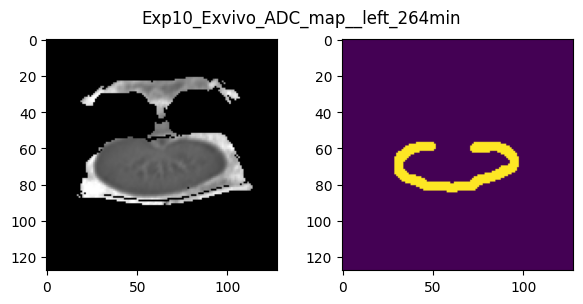

In [89]:
def plot_roi(img, roi, layer=10):
    fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(7, 3))
    fig.suptitle('Exp10_Exvivo_ADC_map__left_264min')
    axs1.imshow(img[:, :, layer], animated = True, cmap='grey')
    axs2.imshow(roi[:, :, layer], animated = True,)
    return (axs1, axs2)

plot_roi(data_img, data_roi, layer=10)
plt.show()

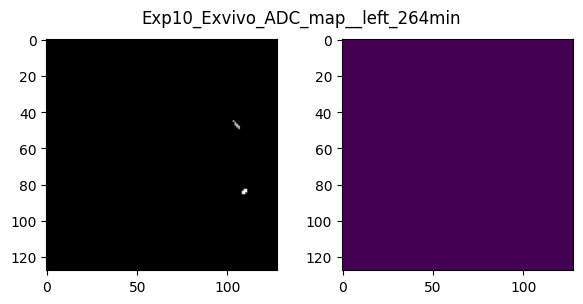

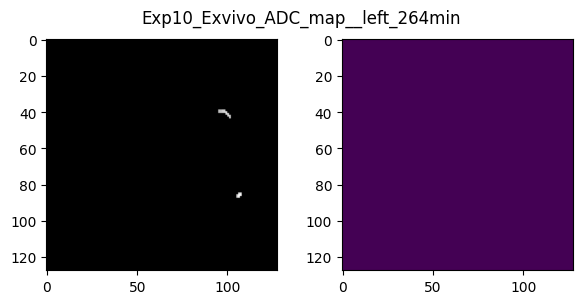

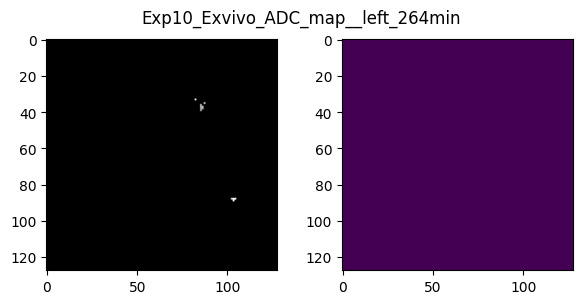

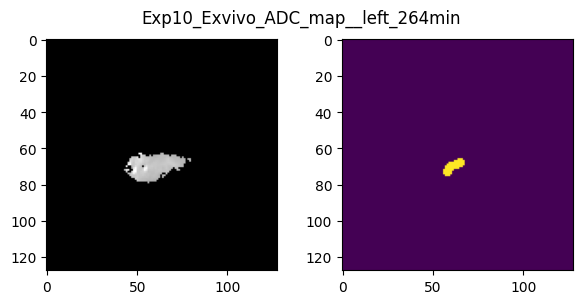

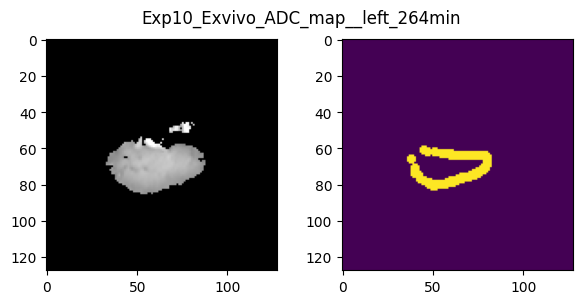

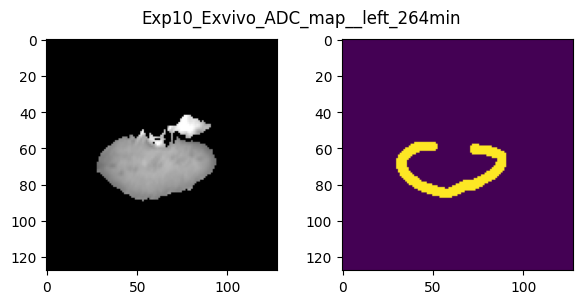

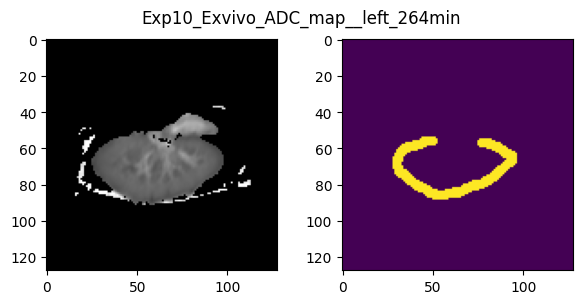

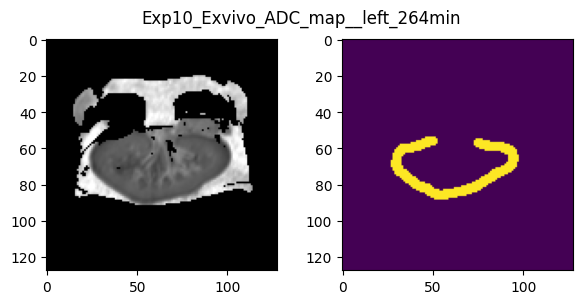

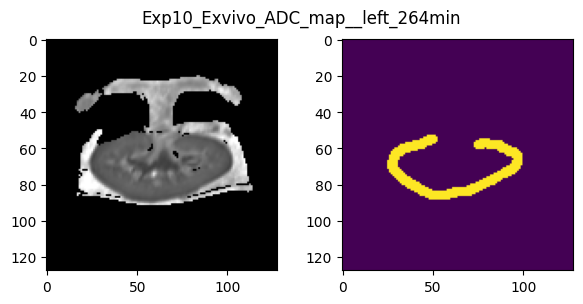

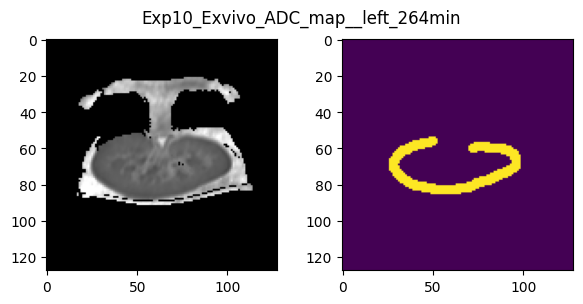

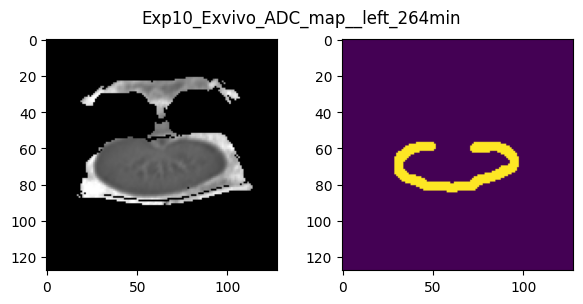

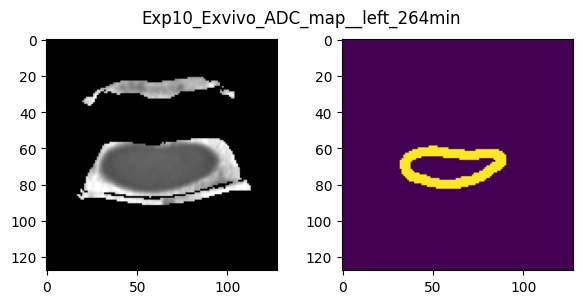

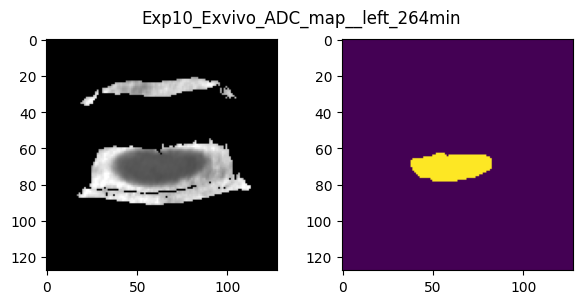

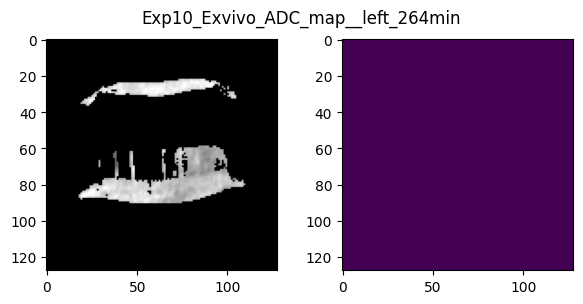

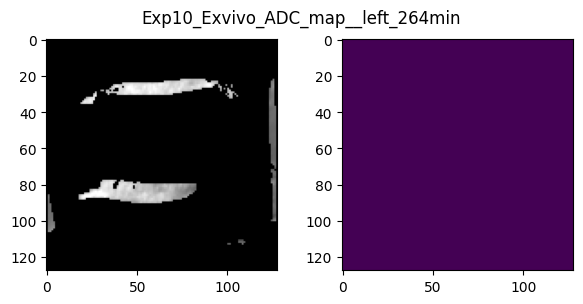

In [90]:
for i in range(data_img.shape[2]):
    plot_roi(data_img, data_roi, i)
    plt.show()